### Importing Required Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

### Importing mnist dataset

In [26]:
from tensorflow.keras.datasets import mnist

### Loading Data into Train and Test set

In [27]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [28]:
X_train.shape

(60000, 28, 28)

### Plotting Images

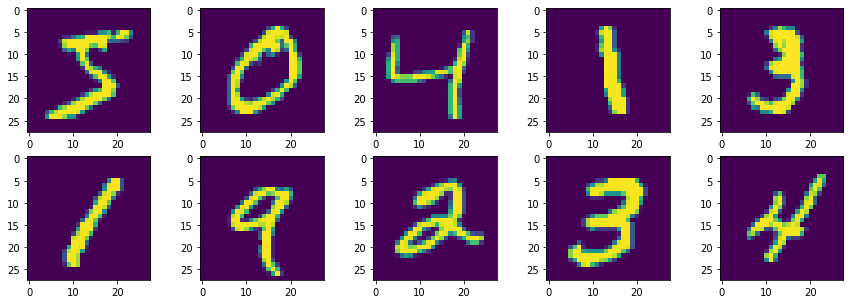

In [29]:
fig,ax = plt.subplots(2,5,figsize=(15,5))
ax[0][0].imshow(X_train[0])
ax[0][1].imshow(X_train[1])
ax[0][2].imshow(X_train[2])
ax[1][0].imshow(X_train[3])
ax[1][1].imshow(X_train[4])
ax[1][2].imshow(X_train[5])
ax[0][3].imshow(X_train[6])
ax[1][3].imshow(X_train[7])
ax[1][4].imshow(X_train[9])
ax[0][4].imshow(X_train[10])
plt.show()

In [30]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [31]:
y_train.shape

(60000,)

### Data Preprocessing

In [32]:
from tensorflow.keras.utils import to_categorical

In [33]:
y_category_train = to_categorical(y_train,10)

In [34]:
y_category_train.shape

(60000, 10)

In [35]:
y_category_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [36]:
y_category_test = to_categorical(y_test,num_classes=10)

In [37]:
y_category_test.shape

(10000, 10)

In [38]:
y_category_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [39]:
X_train = X_train/255

In [40]:
X_test = X_test/255

In [41]:
X_train = X_train.reshape(60000,28,28,1)

In [42]:
X_test = X_test.reshape(10000,28,28,1)

### Model Building

In [43]:
from tensorflow.keras.models import Sequential

In [44]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [45]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

### Model Training

In [48]:
model.fit(X_train,y_category_train,epochs=10,validation_data=(X_test,y_category_test),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 52s 861us/sample - loss: 0.1347 - acc: 0.9595 - val_loss: 0.0485 - val_acc: 0.9835
Epoch 2/10
60000/60000 [==============================] - 49s 818us/sample - loss: 0.0448 - acc: 0.9859 - val_loss: 0.0442 - val_acc: 0.9856
Epoch 3/10
60000/60000 [==============================] - 52s 861us/sample - loss: 0.0288 - acc: 0.9910 - val_loss: 0.0419 - val_acc: 0.9877
Epoch 4/10
60000/60000 [==============================] - 52s 866us/sample - loss: 0.0193 - acc: 0.9937 - val_loss: 0.0381 - val_acc: 0.9877
Epoch 5/10
60000/60000 [==============================] - 52s 862us/sample - loss: 0.0144 - acc: 0.9951 - val_loss: 0.0422 - val_acc: 0.9870


In [49]:
metrics = pd.DataFrame(model.history.history)

In [50]:
metrics

,loss,acc,val_loss,val_acc
0,0.134720,0.959483,0.048457,0.9835
1,0.044832,0.985917,0.044186,0.9856
2,0.028809,0.991017,0.041918,0.9877
3,0.019322,0.993700,0.038052,0.9877
4,0.014401,0.995067,0.042168,0.9870


### Plotting Model Traning and Validation Loss

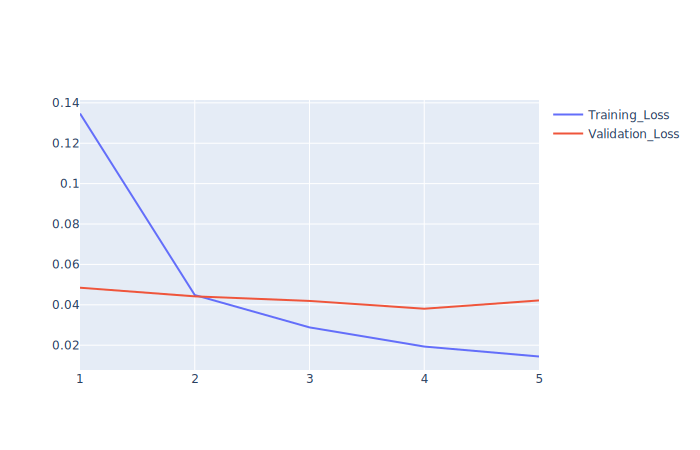

In [52]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=[1,2,3,4,5,6], y=metrics['loss'],
                    mode='lines',
                    name='Training_Loss'))
fig.add_trace(go.Scatter(x=[1,2,3,4,5,6], y=metrics['val_loss'],
                    mode='lines',
                    name='Validation_Loss'))
fig.show("svg")

### Plotting Model Traning and Validation Accuracy

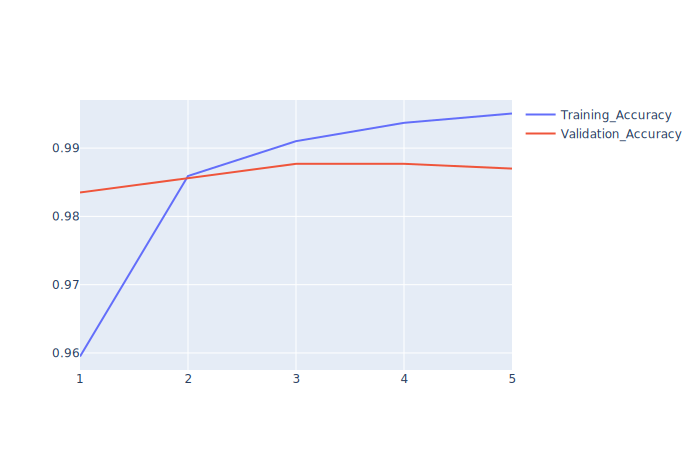

In [54]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=[1,2,3,4,5,6], y=metrics['acc'],
                    mode='lines',
                    name='Training_Accuracy'))
fig.add_trace(go.Scatter(x=[1,2,3,4,5,6], y=metrics['val_acc'],
                    mode='lines',
                    name='Validation_Accuracy'))
fig.show("svg")

In [55]:
model.metrics_names

['loss', 'acc']

In [56]:
model.evaluate(X_test,y_category_test,verbose=0)

[0.04216828863129922, 0.987]

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
predictions = model.predict_classes(X_test)

In [59]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [60]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.99      0.98       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



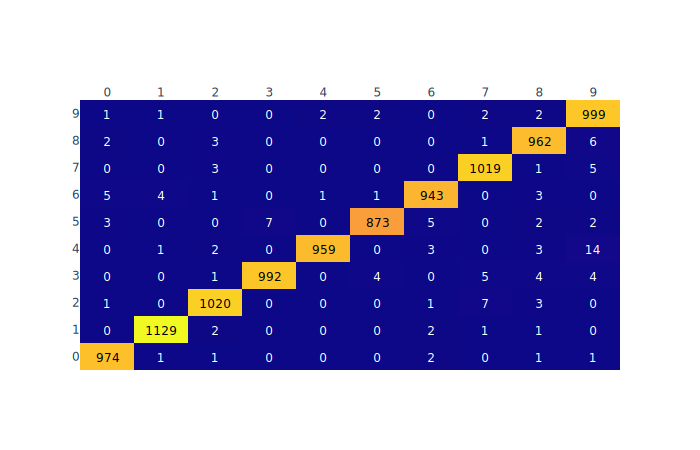

In [61]:
import plotly.figure_factory as ff
fig = ff.create_annotated_heatmap(confusion_matrix(y_test,predictions),x=[0,1,2,3,4,5,6,7,8,9],y=[0,1,2,3,4,5,6,7,8,9])
fig.show("svg")          

In [62]:
my_number = X_test[0]

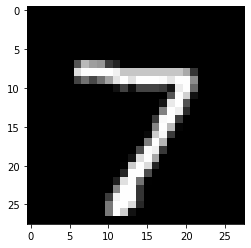

In [63]:
plt.imshow(my_number.reshape(28,28),cmap='gray')

In [64]:
#num_images,width,height,color_channels
model.predict_classes(my_number.reshape(1,28,28,1))

array([7], dtype=int64)